
 SVC(gamma=0.5)

 Confusion Matrix:  [[97  5]
 [15 54]]

 Accuracy :  88.30409356725146

 Report :
               precision    recall  f1-score   support

           B       0.87      0.95      0.91       102
           M       0.92      0.78      0.84        69

    accuracy                           0.88       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.88      0.88       171



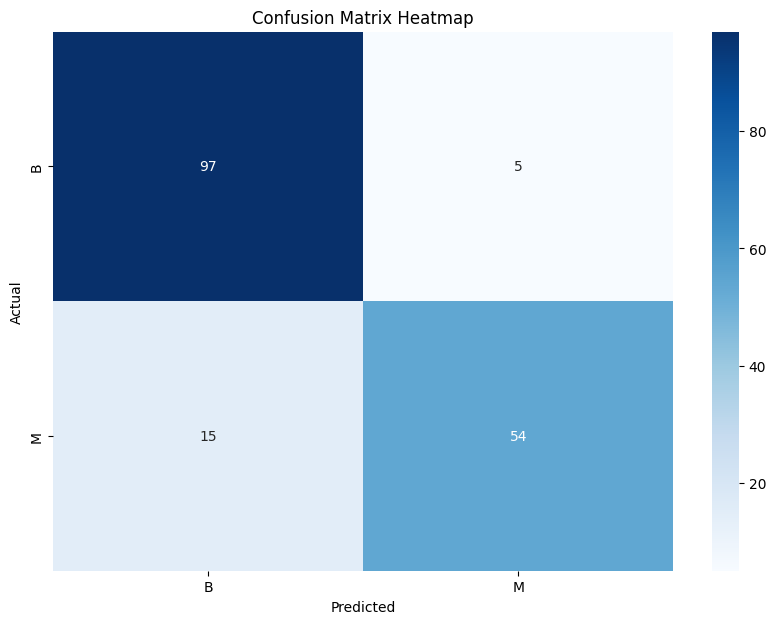

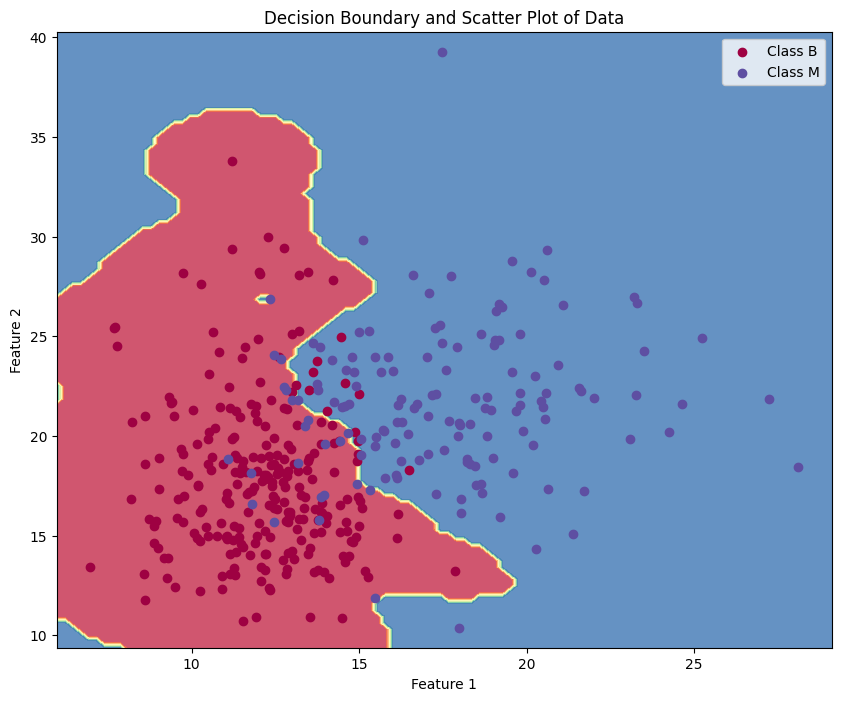

In [26]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
import seaborn as sns

# Function to import data
def importdata():
    balance_data = pd.read_csv('/content/drive/MyDrive/data4.csv', sep=',', header=None)
    return balance_data

# Function to split the dataset into features and target variables
def splitdataset(balance_data):
    # Separating the target variable
    X = balance_data.values[:, 2:]
    y = balance_data.values[:, 1]  # Assuming the target variable is in the second column
    return X, y

# Import the data
balance_data = importdata()

# Split the data into features and target
X, y = splitdataset(balance_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Select two features for plotting
X_train_2d = X_train[:, :2]  # Taking only the first two features for plotting purposes
X_test_2d = X_test[:, :2]

# Build the model with only the first two features
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
print("\n", svm)

# Train the model with the selected two features
svm.fit(X_train_2d, y_train)

# Predict the model with the selected two features
y_pred = svm.predict(X_test_2d)

# Function to calculate and print accuracy
def cal_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("\n Confusion Matrix: ", cm)
    print("\n Accuracy : ", accuracy_score(y_test, y_pred) * 100)
    print("\n Report :\n", classification_report(y_test, y_pred))

    # Plotting the confusion matrix heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

# Calculate and print accuracy
cal_accuracy(y_test, y_pred)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
    svm,
    X_train_2d,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    ax=ax,
    xlabel='Feature 1',
    ylabel='Feature 2',
)

# Scatter plot with color mapping
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

unique_classes = np.unique(y_train_encoded)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_classes)))  # Generate colors from colormap

for i, cls in enumerate(unique_classes):
    idx = y_train_encoded == cls
    ax.scatter(X_train_2d[idx, 0], X_train_2d[idx, 1], color=colors[i], label=f'Class {encoder.inverse_transform([cls])[0]}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Decision Boundary and Scatter Plot of Data')
ax.legend()

# Show the plot
plt.show()

